In [2]:
from epynet import Network
import numpy as np
import math as m
import operator
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src/')
from network_grouping import *

In [3]:
inp = "../input/santaizabel0118.inp"

net = Network(inp)
keys = net.nodes.keys()   # List with uids of each node
all_nodes = [net.nodes[key] for key in keys]   # List of all possible nodes 
net.ep.ENclose()
    
[all_nodes.remove(n) for n in all_nodes if n.node_type != "Junction"]  # Remove elements that are not Junction in all_nodes
node_list = [n.uid for n in all_nodes] 
n_nodes = len(node_list)
    
y_simulated = simulation(inp)
y_simulated = y_simulated[0,:,:]

y_simulated.shape

#print n_nodes

(442L, 49L)

In [4]:
def emitter_flow(emitters):
    min_flow = []
    max_flow = []
    mean_flow = []
    coef_emitter = 0.5
    
    for emitter in emitters: 
        leak_flow = emitter * (y_simulated ** coef_emitter)
        leak_flow = np.mean(leak_flow, axis = 1)    # mean at time 
        leak_flow = 3.6 * leak_flow    # to converte l/s to m³/h

        min_flow.append(min(leak_flow))
        max_flow.append(max(leak_flow))    
        mean_flow.append(np.mean(leak_flow))
    
    return max_flow, mean_flow, min_flow

In [8]:
emitters = np.arange(0, 0.5, 0.004) # the unit of each emitter is l/s per mca
emitters = emitters.tolist()
max_flow, mean_flow, min_flow = emitter_flow(emitters)

In [9]:
new_dataframe = pd.DataFrame(
                        {
                            "Emitters": emitters,
                            "Max_flow(m³/h)": max_flow,
                            "Mean_flow(m³/h)": mean_flow, 
                            "Min_flow(m³/h)": min_flow
                        }
                            )
new_dataframe

Emitters  Max_flow(m³/h)  Mean_flow(m³/h)  Min_flow(m³/h)
0       0.000        0.000000         0.000000        0.000000
1       0.004        0.132010         0.093550        0.050483
2       0.008        0.264021         0.187101        0.100967
3       0.012        0.396031         0.280651        0.151450
4       0.016        0.528041         0.374202        0.201933
5       0.020        0.660052         0.467752        0.252417
6       0.024        0.792062         0.561302        0.302900
7       0.028        0.924072         0.654853        0.353383
8       0.032        1.056082         0.748403        0.403866
9       0.036        1.188093         0.841954        0.454350
10      0.040        1.320103         0.935504        0.504833
11      0.044        1.452113         1.029055        0.555316
12      0.048        1.584124         1.122605        0.605800
13      0.052        1.716134         1.216155        0.656283
14      0.056        1.848144         1.309706        0.706766
15      0.060        1.980155         1.403256        0.757250
16      0.064        2.112165         1.496807        0.807733
17      0.068        2.244175         1.590357        0.858216
18      0.072        2.376185         1.683907        0.908699
19      0.076        2.508196         1.777458        0.959183
20      0.080        2.640206         1.871008        1.009666
21      0.084        2.772216         1.964559        1.060149
22      0.088        2.904227         2.058109        1.110633
23      0.092        3.036237         2.151660        1.161116
24      0.096        3.168247         2.245210        1.211599
25      0.100        3.300258         2.338760        1.262083
26      0.104        3.432268         2.432311        1.312566
27      0.108        3.564278         2.525861        1.363049
28      0.112        3.696289         2.619412        1.413532
29      0.116        3.828299         2.712962        1.464016
..        ...             ...              ...             ...
95      0.380       12.540979         8.887289        4.795914
96      0.384       12.672989         8.980840        4.846397
97      0.388       12.805000         9.074390        4.896880
98      0.392       12.937010         9.167940        4.947364
99      0.396       13.069020         9.261491        4.997847
100     0.400       13.201030         9.355041        5.048330
101     0.404       13.333041         9.448592        5.098814
102     0.408       13.465051         9.542142        5.149297
103     0.412       13.597061         9.635693        5.199780
104     0.416       13.729072         9.729243        5.250263
105     0.420       13.861082         9.822793        5.300747
106     0.424       13.993092         9.916344        5.351230
107     0.428       14.125103        10.009894        5.401713
108     0.432       14.257113        10.103445        5.452197
109     0.436       14.389123        10.196995        5.502680
110     0.440       14.521133        10.290545        5.553163
111     0.444       14.653144        10.384096        5.603647
112     0.448       14.785154        10.477646        5.654130
113     0.452       14.917164        10.571197        5.704613
114     0.456       15.049175        10.664747        5.755097
115     0.460       15.181185        10.758298        5.805580
116     0.464       15.313195        10.851848        5.856063
117     0.468       15.445206        10.945398        5.906546
118     0.472       15.577216        11.038949        5.957030
119     0.476       15.709226        11.132499        6.007513
120     0.480       15.841237        11.226050        6.057996
121     0.484       15.973247        11.319600        6.108480
122     0.488       16.105257        11.413150        6.158963
123     0.492       16.237267        11.506701        6.209446
124     0.496       16.369278        11.600251        6.259930

[125 rows x 4 columns]

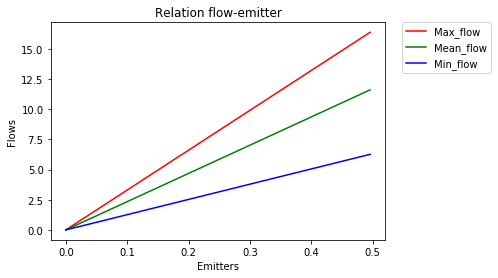

In [11]:
plt.plot(emitters, max_flow, label = "Max_flow", color = "red")
plt.plot(emitters, mean_flow, label = "Mean_flow", color = "green")
plt.plot(emitters, min_flow, label = "Min_flow", color = "blue")

plt.xlabel("Emitters")
plt.ylabel("Flows")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Relation flow-emitter")

plt.show()